# MA124 Maths by Computer: Assignment 4
## Machine Learning Applied to Bike Sharing Demand Data (20 Marks)

Student number: 2113104


In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


Nowadays, rental bikes are becoming more popular amongst citizens. It is important to enable the right amount of bikes, so that people don't have to wait for a long time. The crucial part is to predict how much bikes will be needed at each hour. This notebook provides models for bike count prediction. We consider data given by modified version of [this](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand) dataset. The data includes information such as: Hour, Temperature, Humidity, Wind speed, Visibility, Dew point temperature, Solar Radiation, Rainfall, Snowfall, number of bikes rented per hour, gathered from odd numbered months. There are two regression model trained: linear regression and decision tree regression. The relevant aricle, that used the original data set, can be found [here](https://doi.org/10.1016/j.comcom.2020.02.007).

In [2]:
bikes = pd.read_csv("SeoulBikeData_mod.csv") 

---
First, let's see some important general information about this data.

In [3]:
bikes.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
count,4416.000000,4416.00000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000
mean,704.591259,11.50000,13.203986,59.257246,1.653193,1398.641304,4.723958,0.560181,0.139312,0.070879,5.956522
std,637.407244,6.92297,11.529724,20.162981,0.976361,621.560536,12.671445,0.860496,1.145271,0.437416,3.407262
min,0.000000,0.00000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,189.000000,5.75000,4.500000,44.000000,0.900000,853.000000,-3.500000,0.000000,0.000000,0.000000,3.000000
50%,542.000000,11.50000,14.300000,58.000000,1.500000,1621.000000,6.400000,0.010000,0.000000,0.000000,5.000000
75%,1047.000000,17.25000,22.200000,75.000000,2.200000,1999.000000,14.900000,0.910000,0.000000,0.000000,9.000000
max,3298.000000,23.00000,38.000000,98.000000,6.700000,2000.000000,26.800000,3.520000,35.000000,8.800000,11.000000


---
The histogram shows the frequency of rented bike count at each hour. We can see that smaller values occur a lot more often than the large values. \
Boxplot displays the distribution of the rented bike count. The median value is represented by the orange line and is around 500.

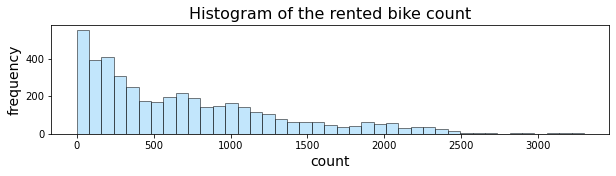

In [4]:
#create histogram
fig = plt.figure(figsize=(10,2))
plt.hist(bikes['Rented Bike Count'], bins=41, color='lightskyblue', alpha=0.5,edgecolor = "k")
plt.title("Histogram of the rented bike count", fontsize=16)
plt.xlabel("count", fontsize=14)
plt.ylabel("frequency", fontsize=14)
plt.show()


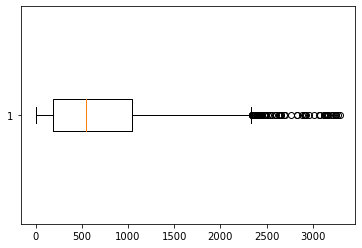

In [5]:
#create boxplot
box=plt.boxplot(bikes['Rented Bike Count'],vert=False)
plt.show()

---
Two figures below show violin plots of the rented bike count depending on month (first one) and hour (second).

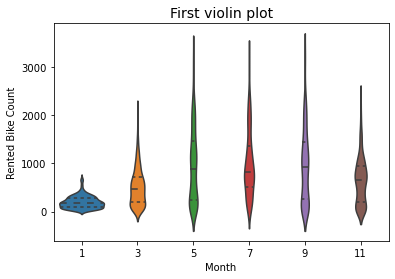

In [6]:
#create violin plot depending on months
sns.violinplot(x='Month', y='Rented Bike Count', data=bikes, inner='quartile')
plt.title("First violin plot", fontsize=14)
plt.show()

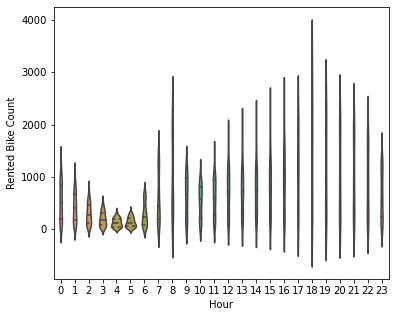

In [7]:
#create violin plot depending on hours
fig = plt.figure(figsize=(6,5))
sns.violinplot(x='Hour', y='Rented Bike Count', data=bikes, inner='quartile')
plt.show()

As we can expect, in the warmer months (May, July, September) there will be times when large amount of bikes is being rented (over 3000). Also, the median in those months is higher than in the others. \
Considering the second figure, during the day, the shape of the distribution indicates that all the bike count values are occuring with approximately the same probability. During the night, values are more concentrated around the median, which is small. 

---
Now we will perform linear regression model with 25% of data used for testing and 75% for training.

In [8]:
#test-train split to perform linear regresion model
X = bikes.drop(['Rented Bike Count'], axis=1)
y = bikes['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
regr = linear_model.LinearRegression()

# Training the model using the train data
regr.fit(X_train, y_train)

# Using the model to predict the test data
y_pred = regr.predict(X_test)
resid = y_test - y_pred

In [9]:
#computing performance metrics
r2 = r2_score(y_test, y_pred)
print("Rsquared :",r2)

RMSE = np.sqrt(np.mean(resid**2))
print("Root mean squared error:",RMSE)

MAE = np.mean(np.abs(resid))
print("Mean absolute error:",MAE)

CV = 100 * RMSE/np.mean(y_test)
print("Coefficient of variation:",round(CV),"%")

Rsquared : 0.4854096645390986
Root mean squared error: 449.6303315282358
Mean absolute error: 331.10297416743816
Coefficient of variation: 64 %


Comparing with the article, Rsqured is smaller and all other results are slightly bigger, so our data for predictions is worse.

---

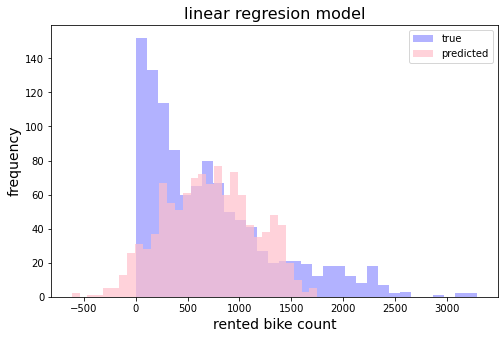

In [10]:
#plotting histograms with true and predicted values
fig=plt.figure(figsize=(8,5))
plt.hist(y_test, bins=31, color='blue', alpha=0.3, label="true")
plt.hist(y_pred, bins=31, color='pink', alpha=0.7, label="predicted")
plt.title("linear regresion model", fontsize=16)
plt.xlabel("rented bike count", fontsize="14")
plt.ylabel("frequency", fontsize="14")
plt.legend()
plt.show()

From the histogram we can say that the predicted values are not very accurate. In some intervals they are nearly the same as true values, whereas for others they differ a lot.

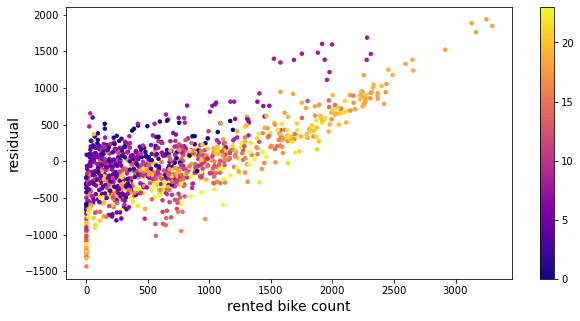

In [11]:
#scatter plot
fig=plt.figure(figsize=(10,5))
plt.scatter(y_test, resid, c = X_test['Hour'], cmap = 'plasma',s=12)
plt.xlabel("rented bike count", fontsize="14")
plt.ylabel("residual", fontsize="14")
plt.colorbar()
plt.show()


Most outcomes are cramped between 0-500 rented bikes and have absolute value of residual smaller or equal to 500.\
The maximum absolute value of residual gets bigger for later hours which corresponds to less accurate predicted values.\
Also, the colours purple and orange are the most frequent, as they correspond to hours when people are most likely to rent a bike.

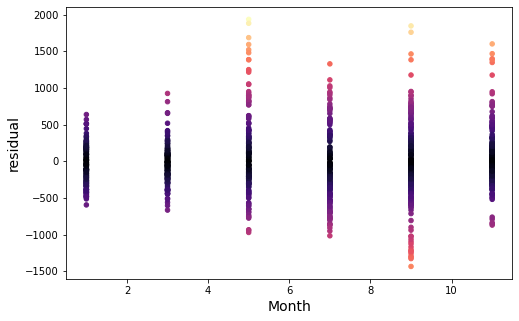

In [12]:
#second scatter plot
fig=plt.figure(figsize=(8,5))
colors = abs(resid)
plt.scatter(X_test['Month'], resid, c=colors, cmap='magma', s=20)
plt.xlabel("Month", fontsize="14")
plt.ylabel("residual", fontsize="14")
plt.show()

In the picture we can observe that, for all of the monts, there are almost no gaps between dots for values of residual approximately between -500 and 500. This means that these values are very frequent. \
The smallest range of residual is in January and March, whereas the range of residual for other months is bigger, when people are more likely to rent a bike (as it gets warmer).

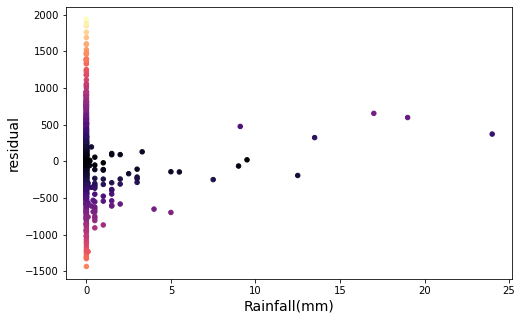

In [13]:
#third scatter plot
fig=plt.figure(figsize=(8,5))
colors = abs(resid)
plt.scatter(X_test['Rainfall(mm)'], resid, c=colors, cmap='magma', s=20)
plt.xlabel('Rainfall(mm)', fontsize="14")
plt.ylabel("residual", fontsize="14")
plt.show()

From this scatter plot, we can deduce that almost all the bikes are being rented when it is not raining. Also, we can notice that when the rainfall value gets bigger, residual value is likely to get bigger as well.

---
Now, we will get predicted values using decision tree regression.

In [14]:
#challenge part- DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)
resid_2=y_test-y_1

In [15]:
#computing performance metrics
r2_2 = r2_score(y_test, y_1)
print("Rsquared :",r2_2)

RMSE_2 = np.sqrt(np.mean(resid_2**2))
print("Root mean squared error:",RMSE_2)

MAE_2 = np.mean(np.abs(resid_2))
print("Mean absolute error:",MAE_2)

CV_2 = 100 * RMSE_2/np.mean(y_test)
print("Coefficient of variation:",round(CV_2),"%")

Rsquared : 0.6302017259332178
Root mean squared error: 381.15992055117994
Mean absolute error: 230.1174553772786
Coefficient of variation: 55 %


Comparing with the linear regresion model, Rsquared value is a lot bigger and all the other results are smaller, which means that predictions will be more accurate.

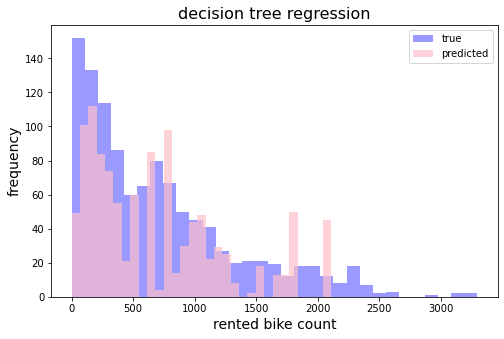

In [16]:
#plotting historams with true and predicted values
fig=plt.figure(figsize=(8,5))
plt.hist(y_test, bins=31, color='blue', alpha=0.4, label="true")
plt.hist(y_1, bins=31, color='pink', label="predicted", alpha=0.7)
plt.title("decision tree regression", fontsize=16)
plt.xlabel("rented bike count", fontsize="14")
plt.ylabel("frequency", fontsize="14")
plt.legend()
plt.show()

We can observe that the predicted values are still not completely accurate, however predctions are better than the ones in linear regresion model, which agrees with the values of performance metrics./

---
We can conclude that predicted values in this notebook are less accurate than the ones in the article, which is because we only used odd numbered months, reducing the number of data. 